<a href="https://colab.research.google.com/github/Je0azul5/IA-ML/blob/main/Regresi%C3%B3n_Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se imortan las bibliotecas necesarias
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#segun el porcentaje, grupo de entrenamiento y grupo de prueba
from sklearn.model_selection import train_test_split
#Modelo de regresion lineal
from sklearn.linear_model import LinearRegression
#Las metricas para evaluar el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math 

%matplotlib inline

In [ ]:
#Se importa el Dataframe
datafMultivariable = pd.read_csv('https://raw.githubusercontent.com/Je0azul5/weired/master/weatherHistory.csv')
datafMultivariable.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#Nombre de cada uno de los features
datafMultivariable.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
#Se quiere observar el tipo de dato de cada features
datafMultivariable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# Se quiere observar los datos perdidos en generl del
# Dataframe
nan_df = datafMultivariable[datafMultivariable.isna().any(axis=1)]
nan_df.count()

Formatted Date              517
Summary                     517
Precip Type                   0
Temperature (C)             517
Apparent Temperature (C)    517
Humidity                    517
Wind Speed (km/h)           517
Wind Bearing (degrees)      517
Visibility (km)             517
Loud Cover                  517
Pressure (millibars)        517
Daily Summary               517
dtype: int64

In [ ]:
# Cantidad de observaciones y features
datafMultivariable.shape

(96453, 12)

In [ ]:
# Situación que puede suceder en los ficheros ".csv,
# es que existan datos perdidos o desaparecidos "missing values"
# es necesario manipular estos datos 
# (borrar, reemplazar: promedio, ...) [análista: procesamiento de datos]
# Proporcion de datos desaparecidos
proporcionNaN = (517/datafMultivariable.shape[0])*100
print("La proporción de datos NaN en el dataframe es: ", proporcionNaN, "%")

La proporción de datos NaN en el dataframe es:  0.5360123583506993 %


In [ ]:
# Como la proporcion de los datos es no significativa (menos del 1%)
# se toma la desición de eliminar las observaciones con data Nan
datafMultivariable.dropna(inplace=True)
datafMultivariable.shape

(95936, 12)

In [ ]:
# A manera de APRENDIZAJE, crearemos un datarame auxiliar con
# las variables númericas
dfAUX = datafMultivariable[['Temperature (C)',
                            'Apparent Temperature (C)',
                            'Humidity',
                            'Wind Speed (km/h)',                            
                            'Wind Bearing (degrees)',
                            'Visibility (km)',
                            'Loud Cover',
                            'Pressure (millibars)']]
dfAUX.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [ ]:
dfAUX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  float64
 1   Apparent Temperature (C)  95936 non-null  float64
 2   Humidity                  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  float64
 4   Wind Bearing (degrees)    95936 non-null  float64
 5   Visibility (km)           95936 non-null  float64
 6   Loud Cover                95936 non-null  float64
 7   Pressure (millibars)      95936 non-null  float64
dtypes: float64(8)
memory usage: 6.6 MB


In [ ]:
# Parece que no se deberia dejar por fuera de nuestro modelo 
# las variables "Summary" "Precip Type" (se sospecha que pueden incidir positivamente sobre el modelo)
# revisemos estas variables "Categoricas"
datafMultivariable["Summary"].unique()


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [ ]:
datafMultivariable["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
# Para variables tipo objeto que representan categórias existe una función "dummy"
# La cual permite transformar a variable "categoricas numericas"
dfDummy = pd.get_dummies(datafMultivariable['Precip Type'])
dfDummy.head()

,rain,snow
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# Agregamos [unimos] a dfAUX nuestro dataframe dfDummy
dfAUX = dfAUX.merge(dfDummy, left_index=True, right_index=True)
dfAUX.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),rain,snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,0


In [ ]:
# Se quiere obtener un resumen estadistico de las observaciones
dfAUX.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),95936.0,11.940976,9.570671,-21.822222,4.604167,12.033333,18.844444,39.905556
Apparent Temperature (C),95936.0,10.862531,10.717812,-27.716667,2.276389,12.033333,18.844444,39.344444
Humidity,95936.0,0.734841,0.195724,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),95936.0,10.804936,6.920727,0.000000,5.796000,9.933700,14.135800,63.852600
Wind Bearing (degrees),95936.0,187.518773,107.385351,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),95936.0,10.362402,4.173780,0.000000,8.372000,10.046400,14.812000,16.100000
Loud Cover,95936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pressure (millibars),95936.0,1003.150038,117.276976,0.000000,1011.890000,1016.420000,1021.050000,1046.380000
rain,95936.0,0.888342,0.314947,0.000000,1.000000,1.000000,1.000000,1.000000
snow,95936.0,0.111658,0.314947,0.000000,0.000000,0.000000,0.000000,1.000000


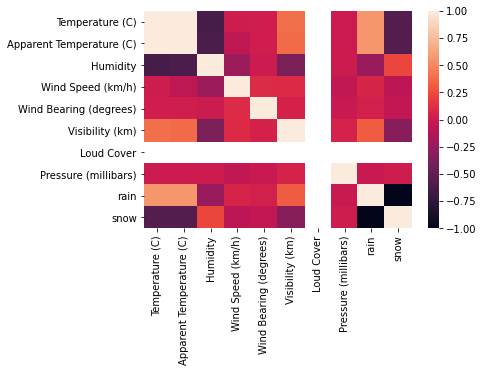

In [ ]:
# Se quiere observar un mapa de calor que representa
# la correlación entre los features
sns.heatmap(dfAUX.corr())

In [ ]:
# Se quiere observar la matriz de correlación solamente (sin mapa de calor
matrixCorrelacion = dfAUX.corr()
matrixCorrelacion

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),rain,snow
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253,0.563503,-0.563503
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037,0.566058,-0.566058
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375,-0.232622,0.232622
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453,0.067771,-0.067771
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629,0.042142,-0.042142
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011,0.316483,-0.316483
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000,-0.009271,0.009271
rain,0.563503,0.566058,-0.232622,0.067771,0.042142,0.316483,NaN,-0.009271,1.000000,-1.000000
snow,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,NaN,0.009271,-1.000000,1.000000


In [ ]:
# En función del valor de correlación (umbral), se presenta una relación entre las variables
# Hacer una función que me seleccione las features segun un "umbral"
def relacionFeatures(corrMatrix, umbral):
  feature = []
  valores = []

  for i, index in enumerate(corrMatrix.index):
    if abs(corrMatrix[index])> umbral:
      feature.append(index)
      valores.append(corrMatrix[index])
  df = pd.DataFrame(data = valores, index = feature, columns = ['Valor de Correlación'])
  return df

In [ ]:
# La idea es seleccionar las variables según un umbral de correlación 
# La idea principal es identificar la MULTICOLINEALIDAD
# La variable TARGET es la sensación térmica "Apparent Temperature (c)"
# ejemplo umbral = 0.2
def valorCorrelacion(umbral):
  valorCorrelacion = relacionFeatures(matrixCorrelacion['Apparent Temperature (C)'], umbral)
  return valorCorrelacion

In [ ]:
#Se transforma el valor de correlación
dataCorrelacion = dfAUX[valorCorrelacion(0.2).index]
dataCorrelacion.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),rain,snow
0,9.472222,7.388889,0.89,15.8263,1,0
1,9.355556,7.227778,0.86,15.8263,1,0
2,9.377778,9.377778,0.89,14.9569,1,0
3,8.288889,5.944444,0.83,15.8263,1,0
4,8.755556,6.977778,0.83,15.8263,1,0


In [ ]:
# Se ajusta a un modelo de Regresión Lineal
x = dataCorrelacion.drop('Apparent Temperature (C)', axis=1)
y = dataCorrelacion['Apparent Temperature (C)']

#Dividir conjunto de Train y Test
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
#Selección del modelo Lineal
modelo=LinearRegression()

In [ ]:
#Entrenar Modelo
modelo.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#variables de prediccion
y_predict_train=modelo.predict(x_train)
y_predict=modelo.predict(x_test)

In [ ]:
#Impresion de los coeficientes y pendiente
print('coeficiente: ',modelo.coef_)
print('Intercepro: ',modelo.intercept_)

coeficiente:  [ 1.13909812  2.18711338 -0.01045404  0.06463067 -0.06463067]
Intercepro:  -4.287650381083125


In [ ]:
#se evalua el modelo con las metricas
#datos predichos vs reales
data ={
   'Actual':y_test,
   'Predicted': y_predict
}
dfPredicted= pd.DataFrame(data)
dfPredicted.head(10)

,Actual,Predicted
79964,17.194444,17.405711
65554,25.044444,25.053682
41894,11.111111,10.403179
35862,13.894444,13.687719
11490,7.161111,7.413943
74751,25.050000,24.711728
65639,17.927778,17.897462
54287,-0.350000,-0.466963
34491,15.555556,15.360334
59536,7.216667,5.949857


In [ ]:
puntuacion = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)

print('Coeficiente de determinacion: ',puntuacion)
print('Mean absolute error: ',mae)
print('Mean Squared Error: ',mse)

Coeficiente de determinacion:  0.9863601533800552
Mean absolute error:  0.9443079749827328
Mean Squared Error:  1.5622325934692725


In [ ]:
def prediction(umbral):
  vr = valorCorrelacion(umbral)
  #Se transforma el valor de correlación
  dataCorrelacion = dfAUX[vr.index]
  dataCorrelacion.head()

  # Se ajusta a un modelo de Regresión Lineal
  x = dataCorrelacion.drop('Apparent Temperature (C)', axis=1)
  y = dataCorrelacion['Apparent Temperature (C)']

  #Dividir conjunto de Train y Test
  x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)
  #Selección del modelo Lineal
  modelo=LinearRegression()
  #Entrenar Modelo
  modelo.fit(x_train,y_train)
  #variables de prediccion
  y_predict_train=modelo.predict(x_train)
  y_predict=modelo.predict(x_test)

  return y_predict, y_test, vr

In [ ]:
def dFFrame(umbral):
  y_predict, y_test, vr = prediction(umbral)
  puntuacion = r2_score(y_test,y_predict)
  mae = mean_absolute_error(y_test,y_predict)
  mse = mean_squared_error(y_test,y_predict)
  vr['Coeficiente de determinacion']= puntuacion
  vr['Error medio']= mae
  vr['Error cuadratico medio']= mse
  return vr

In [ ]:
print("Con un umbral igual a 0.03:\n")
dFFrame(0.03)


Con un umbral igual a 0.03:



,Valor de Correlación,Coeficiente de determinacion,Error medio,Error cuadratico medio
Temperature (C),0.992637,0.989856,0.850153,1.1618
Apparent Temperature (C),1.000000,0.989856,0.850153,1.1618
Humidity,-0.602390,0.989856,0.850153,1.1618
Wind Speed (km/h),-0.057387,0.989856,0.850153,1.1618
Visibility (km),0.382589,0.989856,0.850153,1.1618
rain,0.566058,0.989856,0.850153,1.1618
snow,-0.566058,0.989856,0.850153,1.1618


In [ ]:
print("Con un umbral igual a 0.6:\n")
dFFrame(0.6)


Con un umbral igual a 0.6:



,Valor de Correlación,Coeficiente de determinacion,Error medio,Error cuadratico medio
Temperature (C),0.992637,0.986346,0.944579,1.5638
Apparent Temperature (C),1.000000,0.986346,0.944579,1.5638
Humidity,-0.602390,0.986346,0.944579,1.5638


In [ ]:
print("Con un umbral igual a 0.4:\n")
dFFrame(0.4)


Con un umbral igual a 0.4:



,Valor de Correlación,Coeficiente de determinacion,Error medio,Error cuadratico medio
Temperature (C),0.992637,0.986341,0.942915,1.564409
Apparent Temperature (C),1.000000,0.986341,0.942915,1.564409
Humidity,-0.602390,0.986341,0.942915,1.564409
rain,0.566058,0.986341,0.942915,1.564409
snow,-0.566058,0.986341,0.942915,1.564409


### Concluciones

###1. El umbral y los features son inversamente proporcionales, adicionalmente son importantes para el entrenamiento del modelo  

###2. Las predicciones del clima se muestran por el coeficiente de determinacion

###3. Mientras el valor del umbral sea mas pequeño  el coeficiente sera mas acertado, esto da paso a versiones mas exactas

###4. Al encontrarse las muestras cerca de la regrecionj lineal, el error disminuye cuando los valores de umbral son menores

